https://mset.space - платформа для проведения анализа данных, построения моделей и внедрения моделей в продукцию.


https://mset.space - platform for data analysis, model building and implementation into production.


Ноутбуки для платформы mset.space
https://github.com/MindSetLib/MS-Education

Low code ML - библиотека машинного обучения
https://github.com/MindSetLib/Insolver


Телеграм канал платформы
https://t.me/msetspace

Связь с разработчиками:
telegram: @frankshikhaliev
email: request@mind-set.ru

![](https://s8.hostingkartinok.com/uploads/images/2020/12/828ce2a0e33dfee3f963efa3533fb854.png)

19.12.2020

### Zero Inflated Poisson regression model (ZIP model)

В данном ноутбуке мы рассмотрим способ построения регрессионной модели для целевой переменной, которая принимает неотрицательные значения и у которой наблюдается избыток нулевых значений.

![](https://s8.hostingkartinok.com/uploads/images/2020/12/ecd4fc800ebe136b179c3a0b073049f1.png)

Для таких данных не подходят традиционные модели, т.к. традиционные модели не могут объяснить избыток нулевых значений. Например, если предположить, что процесс подчиняется закону распределения Пуассона с $\lambda = 5$, то нулевое значение можно ожидать в 0.67% случаев.

![](https://s8.hostingkartinok.com/uploads/images/2020/12/4cfa95aeba6bf1b6879be499519fe0c7.png)

Если мы будем использовать Пуассоновскую модель, то она будет давать плохие прогнозы.

К счастью, есть способ модифицировать модель и в данном ноутбуке мы будем рассматривать `Zero Inflated Poisson regression model`, которую чаще называют `ZIP model`.

Вспомним как устроена [Пуассоновска регрессионая модель](https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958).

В распределении Пуассона $\lambda$ олицетворяет количество ожидаемых событий в единицу времени.

В общем случае $\lambda$ меняется от наблюдения к наблюдению и поэтому мы предполагаем, что $\lambda$ зависит от наблюдения $x_i \in R^n$.

![](https://s8.hostingkartinok.com/uploads/images/2020/12/92e987d46ff5789a5a8ccb5c6cf9c29a.png)

Задача регрессионой модели, подогнать наши наблюдения $x_i$ к целевой переменной $y_i$ используя коэфициенты $\beta$. 

Мы предполагаем, что целевая переменная $y_i$ имеет Пуассоновское распределение, а значит вероятность наблюдать $y_i$ зависит от параметра $\lambda$.

Как нам связать наши наблюдения $x_i$, коэффициенты $\beta$ и $\lambda$? Какую функцию использовать?

![](https://s8.hostingkartinok.com/uploads/images/2020/12/ebd55026927086834da5f71f92880c13.png)

Т.к. наши данные неотрицательны, то и $\lambda$ должна быть неотрицательной! Поэтому для связи всех переменных отлично подойдёт экспонента.

![](https://s8.hostingkartinok.com/uploads/images/2020/12/2c24711b9761c59eaa7902ff4f57337f.png)

И чтобы найти оптимальные коэффициенты $\beta$ мы используем метод максимального правдоподобия.

В итоге Пуассоновская регрессионая модель выглядит следующим образом:

![](https://s8.hostingkartinok.com/uploads/images/2020/12/e6028b1e54c0df5b8a14da9e4a0c82f2.png)

Мы вспомнили как строится Пуассоновская регрессионая модель, вернемся к нашей `ZIP model`.

В `ZIP model` мы предполагаем, что существует ещё один процесс, который определяет, является ли $y_i$ равным нулю или нет. Если значение $y_i$ определено как не нулевое, то для предсказания используем Пуассоновскую модель.

Таким образом, `ZIP model` состоит из трёх частей:

1. PMF (Probability Mass Function) $P(y_i = 0) = \phi_i + (1 - \phi_i) e^{-\lambda_i}$ используемая для предсказания нулевых значений.

2. PMF $P(y_i = k) = (1 - \phi_i) \frac{e^{-\lambda_i} \lambda_i^k}{k!}$ используемая для предсказания вероятности $k$ событий, где $k > 0$.

3. И связывающая переменные $x_i, \beta, \lambda$ экспонента $\lambda = e^{x_i \beta}$.

![](https://s8.hostingkartinok.com/uploads/images/2020/12/737d5aa057a9cfccbab0b7f061874c3b.png)

$\phi_i$ это доля избыточных нулей для $i$-го наблюдения.

**Интуиция.** Представим, что мы имеем 1000 наблюдений $y_i$, каждое из которых получено с помощью одного и того же наблюдения $x_i = [x_{i1}, .., x_{im}]$. Т.к. $y_i$ случайная величина подчиняющаяся закону распределения Пуассона, то при одном и том же наблюдении $x_i$ мы можем получить 1000 разных значений $y_i$.

Предположим, что из 1000 наблюдений $y_i$ мы наблюдали 874 нуля. Допустим, распределение Пуассона (возьмем параметризированным как на изображении ниже) может объяснить $0.0067 * 1000 \approx 7$ нулей. Оставшиеся $874 - 7 = 867$ избыточные нули. Поэтому доля избыточных нулей в $i$-м наблюдении будет равно $\phi_i = \frac{867}{1000} = 0.867$.

![](https://s8.hostingkartinok.com/uploads/images/2020/12/4cfa95aeba6bf1b6879be499519fe0c7.png)

**Как оценивается $\phi_i$ в `ZIP model`?**

Вначале трансформируем целевую переменную $y$ в бинарную $y'$, поставим 0 если $y_i$ является нулем, и поставим 1 в другом случае. 

Затем натренируем Логистическую регрессию используя наши данные $X \in R^{n \; x \; m}$ и полученную бинарную переменную $y' \in R^n$, на выходе получим вектор с "вероятностями" $\mu \in R^n$.

Переобозначим вектор $\mu$ как вектор $\phi$.





![](https://s8.hostingkartinok.com/uploads/images/2020/12/f63441fe89a14610ee280b2b10ecf394.png)

Как только вектор $\phi$ определен, мы встраиваем его в нашу модель и находим оптимальные коэффициенты $\beta$ используя метод максимального правдоподобия. 

![](https://s8.hostingkartinok.com/uploads/images/2020/12/1a791d99764c9675544954596808ed08.png)

### Как натренировать ZIP model используя Python?

В данном примере мы будем использовать [датасет о походах](https://gist.github.com/sachinsdate/09cfd42b7701c48ec68b04c786786434).

`FISH_COUNT:` количество пойманной рыбы

`LIVE_BAIT:` была ли использована живая приманка

`CAMPER:` использовала ли группа фургон кемпер

`PERSONS:` количество человек в группе

`CHILDREN:` количество детей в группе

In [1]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/sachinsdate/09cfd42b7701c48ec68b04c786786434/raw/4b50e718a83a4b20adcff5552ccea8f1054ce919/fish.csv')
df

,LIVE_BAIT,CAMPER,PERSONS,CHILDREN,FISH_COUNT
0,0,0,1,0,0
1,1,1,1,0,0
2,1,0,1,0,0
3,1,1,2,1,0
4,1,0,1,0,1
...,...,...,...,...,...
245,1,1,2,0,0
246,1,1,4,3,0
247,1,1,2,1,0
248,1,1,3,2,0


In [3]:
!pip install patsy statsmodels -q

In [4]:
from patsy import dmatrices       # встроит в матрицу X столбец с единицами и автоматически сделает one-hot кодирование
import numpy as np                # линейная алгебра
import statsmodels.api as sm      # отсюда возьмем ZIP model
import matplotlib.pyplot as plt   # создание графиков

Посмотрим, сколько групп поймало определенное количество рыбы.

In [5]:
df.groupby('FISH_COUNT').count()

,LIVE_BAIT,CAMPER,PERSONS,CHILDREN
FISH_COUNT,,,,
0,142,142,142,142
1,31,31,31,31
2,20,20,20,20
3,12,12,12,12
4,6,6,6,6
5,10,10,10,10
6,4,4,4,4
7,3,3,3,3
8,2,2,2,2


In [6]:
mask = np.random.rand(len(df)) < 0.8                    # делаем булеву маску для отбора признаков [True, True, False, ...., True, False]
df_train = df[mask]                                     # отобрать наблюдения, где указано True
df_test = df[~mask]                                     # оператор ~: изменит все True на False, False на True
print('Training data set length = '+ str(len(df_train)))
print('Testing data set length = '+ str(len(df_test)))

Training data set length = 190
Testing data set length = 60


Укажем, что `FISH_COUNT` целевая переменная, а `LIVE_BAIT`, `CAMPER`, `CHILDREN`, `PERSONS` используются для предсказания, как того требует библиотека [Patsy](https://patsy.readthedocs.io/en/latest/quickstart.html).

In [7]:
expr = 'FISH_COUNT ~ LIVE_BAIT  + CAMPER + CHILDREN + PERSONS'

Видим, что в данном случае, функция `dmatrices` в матрицу встроила столбец с единицами и больше не делала никаких преобразований.

In [8]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
X_train

,Intercept,LIVE_BAIT,CAMPER,CHILDREN,PERSONS
0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,2.0
4,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
243,1.0,1.0,1.0,1.0,3.0
244,1.0,1.0,0.0,0.0,3.0
246,1.0,1.0,1.0,3.0,4.0
247,1.0,1.0,1.0,1.0,2.0


Если мы хотим использовать `one-hot` кодирование наших фичей, то нам нужно перевести фичи, которые хотим кодировать в строковый тип данных.

In [9]:
df_cat = df.astype({'LIVE_BAIT': str, 'CAMPER': str, 'CHILDREN': str, 'PERSONS': str}) # изменим тип данных на str

In [10]:
y_example, X_example = dmatrices(expr, df_cat[~mask], return_type='dataframe')
X_example                            

,Intercept,LIVE_BAIT[T.1],CAMPER[T.1],CHILDREN[T.1],CHILDREN[T.2],CHILDREN[T.3],PERSONS[T.2],PERSONS[T.3],PERSONS[T.4]
7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
22,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
24,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
33,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
39,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
42,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
44,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
47,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
54,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Мы не будем использовать `one-hot` кодирование при использовании `ZIP model`.

Внутри `ZIP model` мы будем использовать `Логистическую модель`, для формирования вектора $\phi$. Для этого необходимо установить параметр `inflation = 'logit'`.

Так же мы хотим указать `ZIP model`, что хотим оценить вектор $\phi$ используя теже самые данные, которые используем для предсказания. Для этого нужно установить параметр `exog_infl = X_train` 

In [11]:
ZIP_model = sm.ZeroInflatedPoisson(endog = y_train, exog = X_train, exog_infl = X_train, inflation='logit')

In [12]:
result = ZIP_model.fit() 

         Current function value: 2.253395
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [13]:
poisson = sm.Poisson(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 2.553284
         Iterations 8


In [14]:
print(result.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:              FISH_COUNT   No. Observations:                  190
Model:             ZeroInflatedPoisson   Df Residuals:                      185
Method:                            MLE   Df Model:                            4
Date:                 Sun, 27 Dec 2020   Pseudo R-squ.:                  0.3406
Time:                         14:21:00   Log-Likelihood:                -428.15
converged:                       False   LL-Null:                       -649.29
Covariance Type:             nonrobust   LLR p-value:                 2.018e-94
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept     1.0609      1.195      0.888      0.375      -1.281       3.403
inflate_LIVE_BAIT     0.9662      1.067      0.906      0.365      -1.125       3.057
inflate_CAMPER  

### Интерпретация модели

На выделенные области изображения ниже необходимо обратить внимание.

`converged:` сошлась или нет наша модель

`coef:` коэффициенты модели, наш вектор $\beta$

`std err:` [стандартная ошибка](https://medium.com/analytics-vidhya/standard-error-a-clear-intuition-from-scratch-dedc81727d82)

`z:` z статистика

`P > |z|:` p-value

![](https://s8.hostingkartinok.com/uploads/images/2020/12/75fe9482cdb85f569a4c9261d51debe5.png)

Синей рамкой выделена информация касающаяся `Логистической регрессии`, которая вычисляет вектор $\phi$, определяющий "вероятность" будет или нет поймана рыба?

![](https://s8.hostingkartinok.com/uploads/images/2020/12/45363e9de6b1320ef0a6e29b14aeca64.png)

Обратим внимание, что предикторы `inflate_Intercept`, `inflate_LIVE_BAIT`, `inflate_CAMPER` бесполезны для вычисления вектора $\phi$. Эти коэффициенты не являются статистически значимыми при 95% доверительном уровне, о чем свидетельствует значение `P > |z|`.

Значение `P > |z|` намного выше, чем 0.05 (порог ошибки 5%).

Данные находящиеся в красной рамке относятся к модели Пуассона, которая используется когда значение `FISH_COUNT > 0`.

![](https://s8.hostingkartinok.com/uploads/images/2020/12/cc4ea547d46e233e41a5af06dfd8c8d3.png)

Здесь мы видим, что все регрессоры важны для предсказания, т.к. `P > |z|` у всех регрессоров нулевые.

### Предсказание

Получим предсказание на тестовой выборке и измерим метрику Poisson deviance.

In [18]:
from sklearn.metrics import mean_squared_error, mean_poisson_deviance

In [41]:
preds_zip = result.predict(X_test, exog_infl = X_test)

preds_poisson = poisson.predict(X_test)

[формула](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-tweedie-deviance)

$D(y, y_{pred}, p = 1) = \frac{1}{n} \sum \limits_{i = 0}^{n - 1} 2 (y_i log(\frac{y_i}{\hat{y_i}}) + y_i + \hat{y_i})$

In [45]:
mean_poisson_deviance(y_test, preds_zip), mean_poisson_deviance(y_test, preds_poisson)

(9.776242561512374, 9.380149712394132)

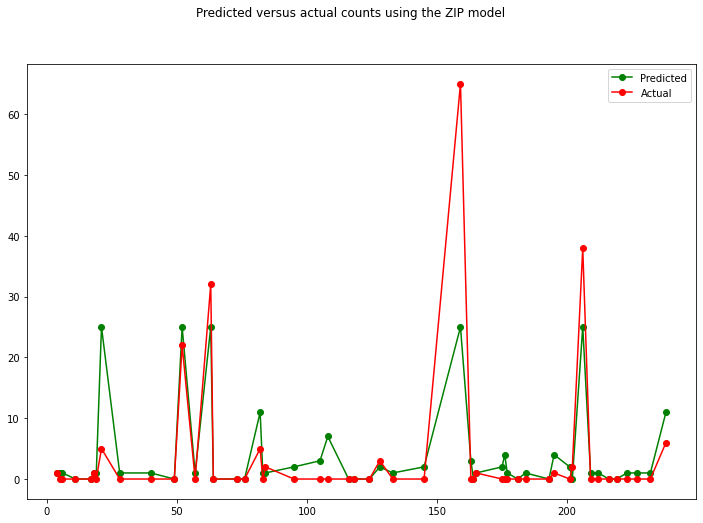

In [ ]:
# укажем размер полотна на котором будем рисовать
fig = plt.figure(figsize=(12, 8)) 
# укажем заголовок графика
fig.suptitle('Predicted versus actual counts using the ZIP model')
# построим графики
plt.plot(X_test.index, predictions_count, 'go-', label = 'Predicted')
plt.plot(X_test.index, y_test, 'ro-', label = 'Actual')
# выведем подписи к графикам
plt.legend()
plt.show()

### Дополнительные материалы

Ноутбук основан на статье: https://towardsdatascience.com/an-illustrated-guide-to-the-zero-inflated-poisson-model-b22833343057

Объяснение регрессионной модели Пуасcона: https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958 